# Natural Language Processing using NLTK

In [133]:
# Install NLTK - pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NLP Part 0 - Get some Data!

This section's code is mostly given to you as a review for how you can scrape and manipulate data from the web. 

In [134]:
import urllib
import bs4 as bs
import re

In [135]:
# We will read the contents of the Wikipedia article "Global_warming" as an example, please feel free to use your own! You can use the url below:
url = 'https://en.wikipedia.org/wiki/Cristiano_Ronaldo' # you can change this to use other sites as well.

# We can open the page using "urllib.request.urlopen" then read it using ".read()"
source = urllib.request.urlopen(url).read()

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
# you may need to install a parser library --> "!pip3 install lxml"
# Parsing the data/creating BeautifulSoup object

soup = bs.BeautifulSoup(source,"html.parser") 

# Fetching the data
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

# Preprocessing the data

text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

In [136]:
text[:100]

' portuguese professional footballer eponyms films cristiano ronaldo dos santos aveiro goih comm (por'

## NLP Part 1 - Tokenization of paragraphs/sentences

In this section we are going to tokenize our sentences and words. If you aren't familiar with tokenization, we recommend looking up "what is tokenization". 

You should also spend time on the [NLTK documentation](https://www.nltk.org/). If you're not sure how to do something, or get an error, it is best to google it first and ask questions as you go!

In [137]:
'''
Your code here: Tokenize the words from the data and set it to a variable called words.
Hint: how to this might be on the very home page of NLTK!
'''
words = nltk.word_tokenize(text)

In [138]:
print(words[:10])

['portuguese', 'professional', 'footballer', 'eponyms', 'films', 'cristiano', 'ronaldo', 'dos', 'santos', 'aveiro']


In [139]:
'''
Your code here: Tokenize the sentences from the data  and set it to a variable called sentences.
Hint: try googling how to tokenize sentences in NLTK!
'''
sentences = nltk.sent_tokenize(text)

In [140]:
print(sentences[:10])

[' portuguese professional footballer eponyms films cristiano ronaldo dos santos aveiro goih comm (portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaɫdu]; born february ) is a portuguese professional footballer who plays as a forward for premier league club manchester united and captains the portugal national team.', "often considered the best player in the world and widely regarded as one of the greatest players of all time, ronaldo has won five ballon d'or awards[note ] and four european golden shoes, the most by a european player.", 'he has won trophies in his career, including seven league titles, five uefa champions leagues, one uefa european championship, and one uefa nations league.', 'ronaldo holds the records for most appearances ( ), most goals ( ), and assists ( ) in the champions league, most goals in the european championship ( ), most international goals by a male player ( ), and most international appearances by a european male ( ).', 'he is one of the few players to have made 

## NLP Part 2 - Stopwords and Punctuation
Now we are going to work to remove stopwords and punctuation from our data. Why do you think we are going to do this? Do some research if you don't know yet. 

In [141]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
'''
define a function called "remove_stopwords" that takes in a list of the sentences of the text and returns one that doesn't have any stopwords.
'''
def remove_stopwords(sentences):
    for i in range(len(sentences)):
        words = []
        word_list = nltk.word_tokenize(sentences[i])
        for word in word_list:
            if word not in stopwords.words('english'):
                words.append(word)
            sentences[i] = ' '.join(words)    
    return sentences

###Then actually apply your function###
sentences = remove_stopwords(sentences)
print(sentences[:10]) #Check if it worked correctly. Are all stopwords removed?

['portuguese professional footballer eponyms films cristiano ronaldo dos santos aveiro goih comm ( portuguese pronunciation : [ kɾiʃˈtjɐnu ʁɔˈnaɫdu ] ; born february ) portuguese professional footballer plays forward premier league club manchester united captains portugal national team .', "often considered best player world widely regarded one greatest players time , ronaldo five ballon d'or awards [ note ] four european golden shoes , european player .", 'trophies career , including seven league titles , five uefa champions leagues , one uefa european championship , one uefa nations league .', 'ronaldo holds records appearances ( ) , goals ( ) , assists ( ) champions league , goals european championship ( ) , international goals male player ( ) , international appearances european male ( ) .', 'one players made , professional career appearances , scored official senior career goals club country .', 'ronaldo began senior career sporting cp , signing manchester united , aged , winning 

In [143]:
'''
define a function called "remove_punctuation" that removes punctuation from the sentences.
'''
def remove_punctuation(sentences):
    for i in range(len(sentences)):
        words = []
        word_list = nltk.word_tokenize(sentences[i])
        for word in word_list:
            if word not in ',;.?!()[]–``' and word != "'s":
                words.append(word)
            sentences[i] = ' '.join(words)    
    return sentences
    ### Some code goes here. Hint: Try looking up how to remove stopwords in NLTK if you get stuck. ###
    
    return sentences
sentences = remove_punctuation(sentences)
print(sentences[:10]) #eliminating all punctuation.

['portuguese professional footballer eponyms films cristiano ronaldo dos santos aveiro goih comm portuguese pronunciation : kɾiʃˈtjɐnu ʁɔˈnaɫdu born february portuguese professional footballer plays forward premier league club manchester united captains portugal national team', "often considered best player world widely regarded one greatest players time ronaldo five ballon d'or awards note four european golden shoes european player", 'trophies career including seven league titles five uefa champions leagues one uefa european championship one uefa nations league', 'ronaldo holds records appearances goals assists champions league goals european championship international goals male player international appearances european male', 'one players made professional career appearances scored official senior career goals club country', 'ronaldo began senior career sporting cp signing manchester united aged winning fa cup first season', "would also go onto win three consecutive premier league t

## NLP Part 3a - Stemming the words
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. There is an example below!

In [0]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# try each of the words below
stemmer.stem('troubled')
#stemmer.stem('trouble')
#stemmer.stem('troubling')
#stemmer.stem('troubles')

In [0]:
'''
Your code here:
Define a function called "stem_sentences" that takes in a list of sentences and returns a list of stemmed sentences.
'''
def stem_sentences(sentences):
    ### Some code goes here. Hint: Try looking up how to stem words in NLTK if you get stuck (or simply use the example above and run stemmer in a loop!). ###


In [0]:

print(stemmed_sentences[:10])

## NLP Part 3b - Lemmatization
Lemmatization considers the context and converts the word to its meaningful base form. There is a cool tutorial and definition of lemmatization in NLTK [here](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/).

In [144]:
from nltk.stem import WordNetLemmatizer
    
## Step 1: Import the lemmatizer
lemmatizer = WordNetLemmatizer()

'''
Your code here: Define a function called "lem_sentences" that: loops through the sentences, split the sentences up by words and applies "lemmatizer.lemmatize" to each word and then join everything back into a sentence
'''
##Similar to stopwords: For loop through the sentences, split by words and apply "lemmatizer.lemmatize" to each word and join back into a sentence
def lem_sentences(sentences):
    for i in range(len(sentences)):
        words = []
        word_list = nltk.word_tokenize(sentences[i])
        for word in word_list:
            words.append(lemmatizer.lemmatize(word))
            sentences[i] = ' '.join(words)    
    return sentences

In [145]:
sentences = lem_sentences(sentences)
print(sentences[:10]) 

['portuguese professional footballer eponym film cristiano ronaldo do santos aveiro goih comm portuguese pronunciation : kɾiʃˈtjɐnu ʁɔˈnaɫdu born february portuguese professional footballer play forward premier league club manchester united captain portugal national team', "often considered best player world widely regarded one greatest player time ronaldo five ballon d'or award note four european golden shoe european player", 'trophy career including seven league title five uefa champion league one uefa european championship one uefa nation league', 'ronaldo hold record appearance goal assist champion league goal european championship international goal male player international appearance european male', 'one player made professional career appearance scored official senior career goal club country', 'ronaldo began senior career sporting cp signing manchester united aged winning fa cup first season', "would also go onto win three consecutive premier league title champion league fifa 

## NLP Part 4 - POS Tagging
Parts of speech tagging is marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.

In [146]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [147]:
# POS Tagging example
# CC - coordinating conjunction
# NN - noun, singular (cat, tree)
all_words = nltk.word_tokenize(text)  ###If we want to look at part of speech taking before we stem/lem

tagged_words = nltk.pos_tag(all_words)
##Creates a list of lists where each element of the list is [word,partofspeech abbreviation]

# Tagged word paragraph
word_tags = []
for tw in tagged_words:
    word_tags.append(tw[0]+"_"+tw[1])

tagged_paragraph = ' '.join(word_tags)

'''
Your code here: print the first 1000 characters of tagged_paragraph.
'''
tagged_paragraph[:1000]

"portuguese_JJ professional_JJ footballer_NN eponyms_NN films_NNS cristiano_VBP ronaldo_JJ dos_NN santos_NN aveiro_NN goih_NN comm_NN (_( portuguese_JJ pronunciation_NN :_: [_JJ kɾiʃˈtjɐnu_NN ʁɔˈnaɫdu_NNP ]_NNP ;_: born_VBN february_NN )_) is_VBZ a_DT portuguese_JJ professional_JJ footballer_NN who_WP plays_VBZ as_IN a_DT forward_NN for_IN premier_JJR league_NN club_NN manchester_NN united_JJ and_CC captains_VBZ the_DT portugal_JJ national_JJ team_NN ._. often_RB considered_VBD the_DT best_JJS player_NN in_IN the_DT world_NN and_CC widely_RB regarded_VBD as_IN one_CD of_IN the_DT greatest_JJS players_NNS of_IN all_DT time_NN ,_, ronaldo_NN has_VBZ won_VBN five_CD ballon_NN d'or_NN awards_NNS [_VBP note_NN ]_NN and_CC four_CD european_JJ golden_JJ shoes_NNS ,_, the_DT most_RBS by_IN a_DT european_JJ player_NN ._. he_PRP has_VBZ won_VBN trophies_NNS in_IN his_PRP$ career_NN ,_, including_VBG seven_CD league_JJ titles_NNS ,_, five_CD uefa_JJ champions_NNS leagues_NNS ,_, one_CD uefa_JJ eu

# Word2Vec Model Visualization



In [148]:
# Install gensim - pip install gensim
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [149]:
#Let's go ahead and create a list that's formatted how word2vec needs:
    # a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)
tokenized = []

for sentence in sentences:
    tokenized.append(nltk.word_tokenize(sentence))

In [150]:
# print the tokenized list of lists
print(tokenized[:10])

[['portuguese', 'professional', 'footballer', 'eponym', 'film', 'cristiano', 'ronaldo', 'do', 'santos', 'aveiro', 'goih', 'comm', 'portuguese', 'pronunciation', ':', 'kɾiʃˈtjɐnu', 'ʁɔˈnaɫdu', 'born', 'february', 'portuguese', 'professional', 'footballer', 'play', 'forward', 'premier', 'league', 'club', 'manchester', 'united', 'captain', 'portugal', 'national', 'team'], ['often', 'considered', 'best', 'player', 'world', 'widely', 'regarded', 'one', 'greatest', 'player', 'time', 'ronaldo', 'five', 'ballon', "d'or", 'award', 'note', 'four', 'european', 'golden', 'shoe', 'european', 'player'], ['trophy', 'career', 'including', 'seven', 'league', 'title', 'five', 'uefa', 'champion', 'league', 'one', 'uefa', 'european', 'championship', 'one', 'uefa', 'nation', 'league'], ['ronaldo', 'hold', 'record', 'appearance', 'goal', 'assist', 'champion', 'league', 'goal', 'european', 'championship', 'international', 'goal', 'male', 'player', 'international', 'appearance', 'european', 'male'], ['one', '

## Training the Word2Vec model

For this part you may want to follow a guide [here](https://radimrehurek.com/gensim/models/word2vec.html). 

In [151]:
''' Training the Word2Vec model. You should pass:
1. a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence
2. min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
'''
# create the model
model = Word2Vec(tokenized, min_count=1)
# get the most common words of the model (it's entire vocabulary)
most_common_words = model.wv.index_to_key
# save the model to use it later
model.save("word2vec.model")
# model = Word2Vec.load("word2vec.model")

In [152]:
#print the first 10 most common words.
most_common_words[:10]

['ronaldo',
 'goal',
 'player',
 'scored',
 'first',
 'win',
 'league',
 'season',
 'club',
 'united']

In [0]:
# Look up the most similar words to certain words in your text using the model.wv.most_similar() function

In [153]:
model.wv.most_similar('ronaldo')

[('goal', 0.8931080102920532),
 ('player', 0.8821325302124023),
 ('madrid', 0.8648289442062378),
 ('league', 0.8614766597747803),
 ('win', 0.8605628609657288),
 ('million', 0.8415668606758118),
 ('juventus', 0.8414961099624634),
 ('record', 0.8390784859657288),
 ('play', 0.8358451724052429),
 ('second', 0.8356205821037292)]

## Testing our model

In [0]:
    # Finding Word Vectors - print word vectors for certain words in your text


In [0]:
    ### Finding the most similar words in the model ###


In [0]:
similar1, similar2

<Figure size 432x288 with 0 Axes>

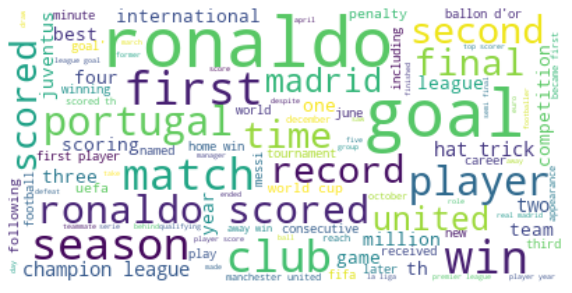

In [154]:
# code to print a wordcloud for your sentences
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42
                        ).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Why did we do all this work?

In [0]:
# reFetching the data
lame_text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    lame_text += paragraph.text

In [0]:
'''
Doing the same without removing stop words or lemming
'''
# tokenize the text using sent_tokenize

# from this list of sentences, create a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)

In [0]:
# Redo the word cloud but set stopwords to empty so it looks really bad
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42, ###SET STOPWORDS = [] and/or include_numbers = True or you will get the same thing!!!
                        stopwords = [],
                        include_numbers = True).generate(str(lame_sentences)) 
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
# Training the Word2Vec model (same code as before), but one change: use our lame data that was not preprocessed

# Try printing this after training the model.
words = model.wv.index_to_key
print(words[:10])

In [0]:
# Finding a vector of a word, but badly

In [0]:
### Finding the most similar words in the model but... you get the idea ###



## Reflection
How important do you think proper preprocessing in NLP is?